# **importing Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing libraries**

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import keras

# **Data pre processing**

## **Trainging image preprocessing**

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_and_vegetable_recognition_system/train',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (64,64),
    color_mode = 'rgb',
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


# **Validation image pre processing**

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_and_vegetable_recognition_system/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (64, 64),
    color_mode = 'rgb',
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


# **Model Building**

In [8]:
cnn = tf.keras.models.Sequential()

#**Building convolution layer**

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5)) # to avoid overfitting

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

Output Layer

In [16]:
cnn.add(tf.keras.layers.Dense(units = 36, activation = 'softmax'))

#**Compiling**

In [17]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 626ms/step - accuracy: 0.7689 - loss: 1.1352 - val_accuracy: 0.8262 - val_loss: 1.2041
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 662ms/step - accuracy: 0.7608 - loss: 1.1244 - val_accuracy: 0.9003 - val_loss: 1.1875
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 663ms/step - accuracy: 0.7975 - loss: 0.8647 - val_accuracy: 0.8689 - val_loss: 1.4882
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 666ms/step - accuracy: 0.7952 - loss: 1.0679 - val_accuracy: 0.8262 - val_loss: 1.5975
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 620ms/step - accuracy: 0.7802 - loss: 1.1926 - val_accuracy: 0.8632 - val_loss: 1.4787
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 655ms/step - accuracy: 0.8079 - loss: 0.8554 - val_accuracy: 0.9231 - val_loss: 0.9959
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 654ms/step - accuracy: 0.8121 - loss: 0.7938 - val_accuracy: 0.8661 - val_loss: 1.2764
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 634ms/step - accuracy: 0.8203 - loss: 0.8662 - val_accu

#**Saving the Model**

In [48]:
cnn.save('trained_model.h5')

In [49]:
training_history.history

{'accuracy': [0.7714285850524902,
  0.7624397873878479,
  0.7951846122741699,
  0.7996789813041687,
  0.7967897057533264,
  0.8131621479988098,
  0.8221508860588074,
  0.8253611326217651,
  0.8343499302864075,
  0.8443017601966858,
  0.8484750986099243,
  0.8333868384361267,
  0.8471910357475281,
  0.8526484966278076,
  0.8609951734542847,
  0.8616372346878052,
  0.8680577874183655,
  0.869983971118927,
  0.8712680339813232,
  0.866131603717804,
  0.8738362789154053,
  0.8780096173286438,
  0.8882824778556824,
  0.8776885867118835,
  0.8844301700592041,
  0.8844301700592041,
  0.8979133367538452,
  0.9027287364006042,
  0.8927769064903259,
  0.9158908724784851,
  0.9004815220832825,
  0.9075441360473633,
  0.9033707976341248,
  0.9062600135803223,
  0.9075441360473633,
  0.9171749353408813,
  0.9139646887779236,
  0.9120385050773621,
  0.9162119030952454,
  0.9165329337120056,
  0.9030497670173645,
  0.9261637330055237,
  0.9113964438438416,
  0.9168539047241211,
  0.9248796105384827,


In [50]:
#Recording history in json
import json
with open ('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [51]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#**Calculating Accuracy of Model achieved on Validation set**

In [52]:
print("validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

validation set accuracy: 95.44159770011902 %


#**Accuracy visualization**

Training visualization

In [53]:
training_history.history['accuracy']

[0.7714285850524902,
 0.7624397873878479,
 0.7951846122741699,
 0.7996789813041687,
 0.7967897057533264,
 0.8131621479988098,
 0.8221508860588074,
 0.8253611326217651,
 0.8343499302864075,
 0.8443017601966858,
 0.8484750986099243,
 0.8333868384361267,
 0.8471910357475281,
 0.8526484966278076,
 0.8609951734542847,
 0.8616372346878052,
 0.8680577874183655,
 0.869983971118927,
 0.8712680339813232,
 0.866131603717804,
 0.8738362789154053,
 0.8780096173286438,
 0.8882824778556824,
 0.8776885867118835,
 0.8844301700592041,
 0.8844301700592041,
 0.8979133367538452,
 0.9027287364006042,
 0.8927769064903259,
 0.9158908724784851,
 0.9004815220832825,
 0.9075441360473633,
 0.9033707976341248,
 0.9062600135803223,
 0.9075441360473633,
 0.9171749353408813,
 0.9139646887779236,
 0.9120385050773621,
 0.9162119030952454,
 0.9165329337120056,
 0.9030497670173645,
 0.9261637330055237,
 0.9113964438438416,
 0.9168539047241211,
 0.9248796105384827,
 0.9075441360473633,
 0.9216693639755249,
 0.921027302742

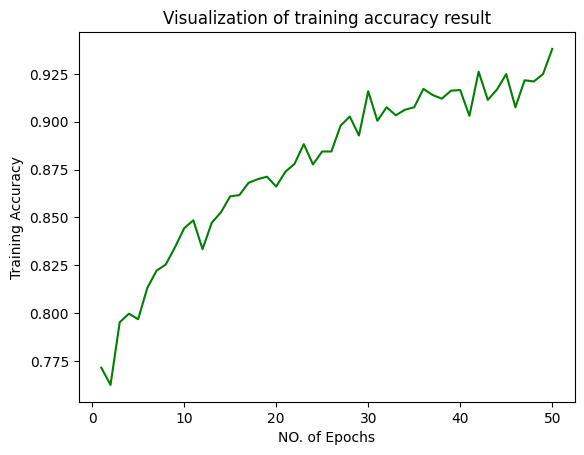

In [54]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs,training_history.history['accuracy'], color = 'green')
plt.title('Visualization of training accuracy result')
plt.xlabel('NO. of Epochs')
plt.ylabel('Training Accuracy')
plt.show()

#**Validation accuracy**

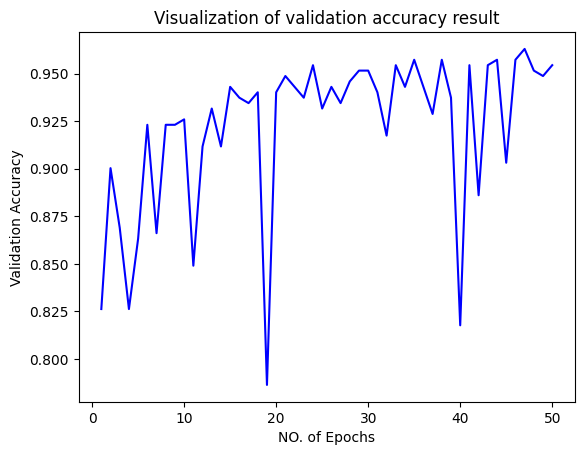

In [55]:
plt.plot(epochs,training_history.history['val_accuracy'], color = 'blue')
plt.title('Visualization of validation accuracy result')
plt.xlabel('NO. of Epochs')
plt.ylabel('Validation Accuracy')
plt.show()
#